In [99]:
import pandas as pd
import numpy as np

from termcolor import cprint 
import seaborn as sns

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [100]:
# Importing dataset
df = pd.read_csv('loan/loan.csv')

In [101]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [103]:
# Calculating the percentage of missing values in each column
for col in df.columns:
    per = df[col].isnull().sum()/len(df[col])*100
    print(col , '-' , per)

id - 0.0
member_id - 0.0
loan_amnt - 0.0
funded_amnt - 0.0
funded_amnt_inv - 0.0
term - 0.0
int_rate - 0.0
installment - 0.0
grade - 0.0
sub_grade - 0.0
emp_title - 5.799325879922783
emp_length - 5.051392922302647
home_ownership - 0.0
annual_inc - 0.00045076568185634325
verification_status - 0.0
issue_d - 0.0
loan_status - 0.0
pymnt_plan - 0.0
url - 0.0
desc - 85.7977256617522
purpose - 0.0
title - 0.017129095910541042
zip_code - 0.0
addr_state - 0.0
dti - 0.0
delinq_2yrs - 0.0032680511934584885
earliest_cr_line - 0.0032680511934584885
inq_last_6mths - 0.0032680511934584885
mths_since_last_delinq - 51.19706461387975
mths_since_last_record - 84.55530275113566
open_acc - 0.0032680511934584885
pub_rec - 0.0032680511934584885
revol_bal - 0.0
revol_util - 0.05657109307297107
total_acc - 0.0032680511934584885
initial_list_status - 0.0
out_prncp - 0.0
out_prncp_inv - 0.0
total_pymnt - 0.0
total_pymnt_inv - 0.0
total_rec_prncp - 0.0
total_rec_int - 0.0
total_rec_late_fee - 0.0
recoveries - 0.0

In [104]:
# Dropping all the columns which have missing value of 25% or more
for col in df.columns:
    if ((df[col].isna().sum()/len(df))*100) >= 25:
        df = df.drop([col], axis=1)
        
df.shape
    

(887379, 52)

In [105]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [106]:
# Number of unique entries in each column
for col in df.columns:
    print(col ,"--->", df[col].nunique())

id ---> 887379
member_id ---> 887379
loan_amnt ---> 1372
funded_amnt ---> 1372
funded_amnt_inv ---> 9856
term ---> 2
int_rate ---> 542
installment ---> 68711
grade ---> 7
sub_grade ---> 35
emp_title ---> 299271
emp_length ---> 11
home_ownership ---> 6
annual_inc ---> 49384
verification_status ---> 3
issue_d ---> 103
loan_status ---> 10
pymnt_plan ---> 2
url ---> 887379
purpose ---> 14
title ---> 63144
zip_code ---> 935
addr_state ---> 51
dti ---> 4086
delinq_2yrs ---> 29
earliest_cr_line ---> 697
inq_last_6mths ---> 28
open_acc ---> 77
pub_rec ---> 32
revol_bal ---> 73740
revol_util ---> 1356
total_acc ---> 135
initial_list_status ---> 2
out_prncp ---> 248332
out_prncp_inv ---> 266244
total_pymnt ---> 506726
total_pymnt_inv ---> 506616
total_rec_prncp ---> 260227
total_rec_int ---> 324635
total_rec_late_fee ---> 6181
recoveries ---> 23055
collection_recovery_fee ---> 20708
last_pymnt_d ---> 98
last_pymnt_amnt ---> 232451
last_credit_pull_d ---> 103
collections_12_mths_ex_med ---> 12
po

In [107]:
df.shape

(887379, 52)

### Exploring target variable

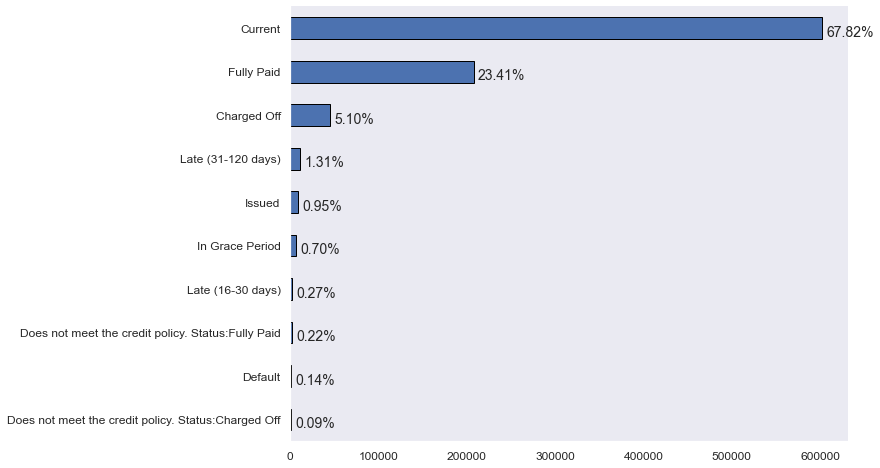

In [108]:
plt.figure(figsize=(10,8))

ax = df['loan_status'].value_counts().sort_values().plot.barh(edgecolor='black', grid=False, fontsize=12)

for p in ax.patches:
    width = p.get_width()
    ax.text(width+5000, p.get_y(), '{:.2%}'.format(width/len(df)), ha='left', va='bottom', fontsize=14)

sns.despine() 

Majority of the dataset is positive(90%+). The dataset is highly imbalanced.

In [109]:
#getting the dataframe of specific loan_status
charged_off = df.loc[df['loan_status'] == 'Charged Off']
default = df.loc[df['loan_status'] == 'Default']
nopol_charged_off = df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']
fully_paid = df.loc[df['loan_status'] == 'Fully Paid']

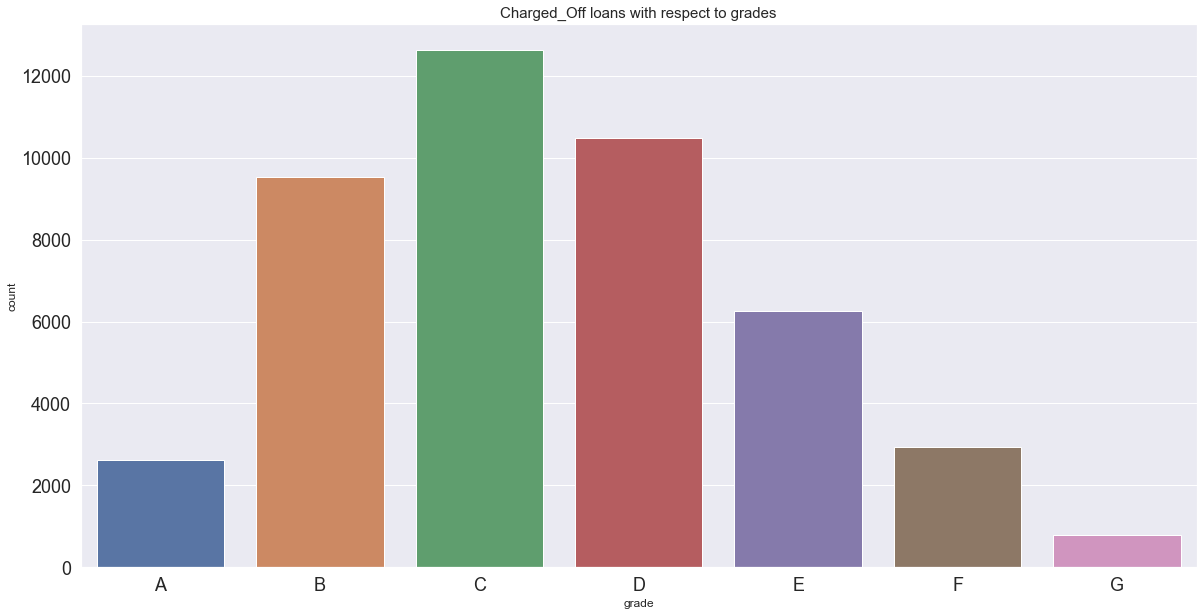

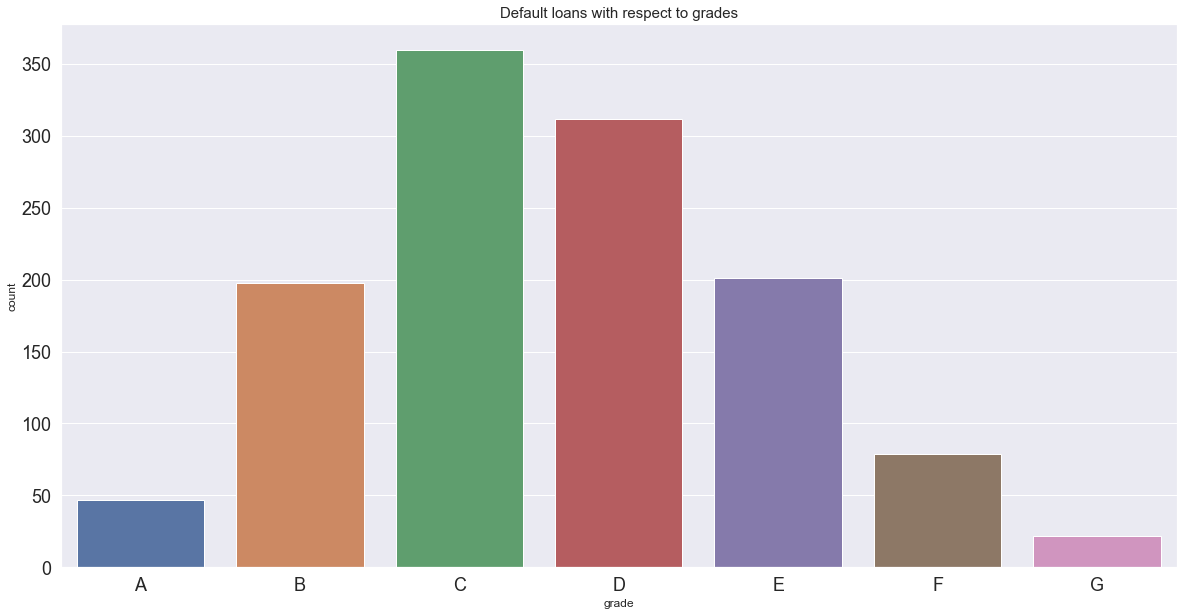

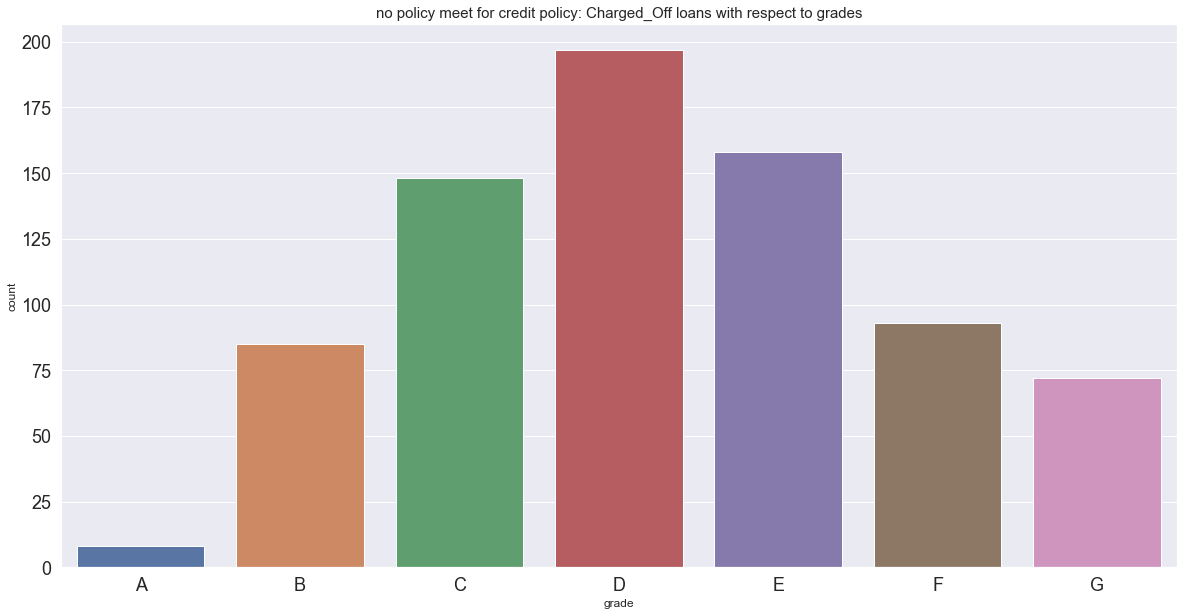

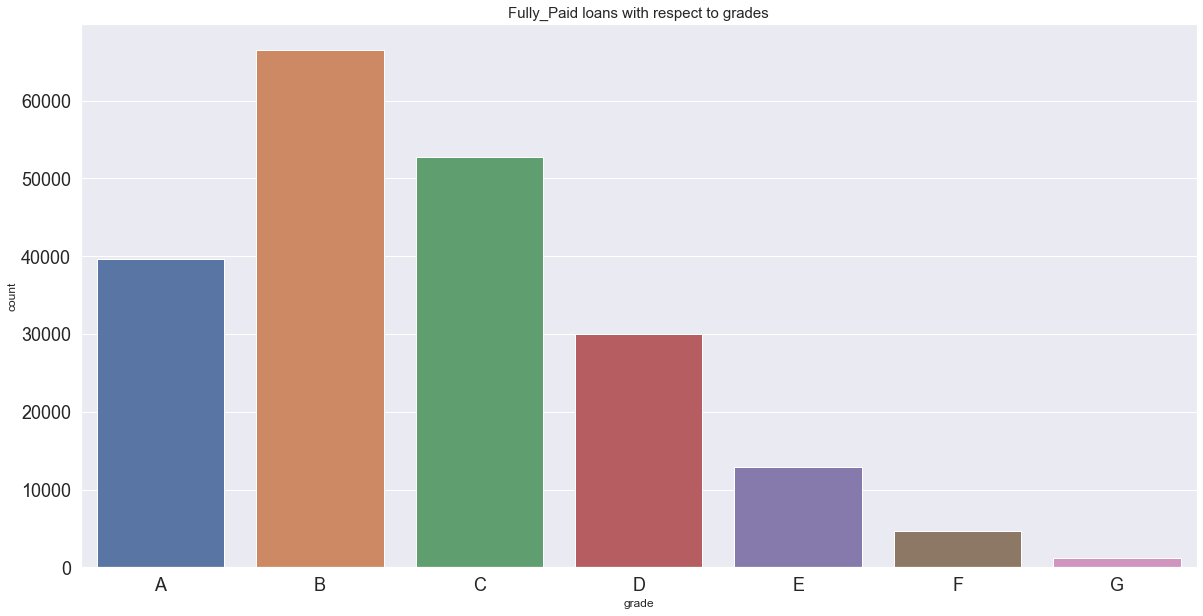

In [110]:
sns.set(rc ={'figure.figsize':(20,10)})
def loan_grade(data, name):
    data_grade = data.groupby(['grade']).size().reset_index(name='count')
    data_grade['percentage_(%)'] = (data_grade['count']/len(data))*100

    sns.barplot(x = 'grade', y = 'count', data = data_grade)
    plt.title('{} loans with respect to grades'.format(name), fontsize = 15)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

loan_grade(charged_off, 'Charged_Off')
loan_grade(default, 'Default')
loan_grade(nopol_charged_off, 'no policy meet for credit policy: Charged_Off')
loan_grade(fully_paid, 'Fully_Paid')

loan grades are the grades assigned to a loan based on borrowers past credit history. The poor the history is the lower a grade it gets.

loans of grades B C and D are making up more than 70% of charged off loans.
similar situation is with defaulted loans.
condition becomes worse with no policy meet loans.
here we can observe a clear pattern that as the loan grade goes from A to G the Risk increases as well.

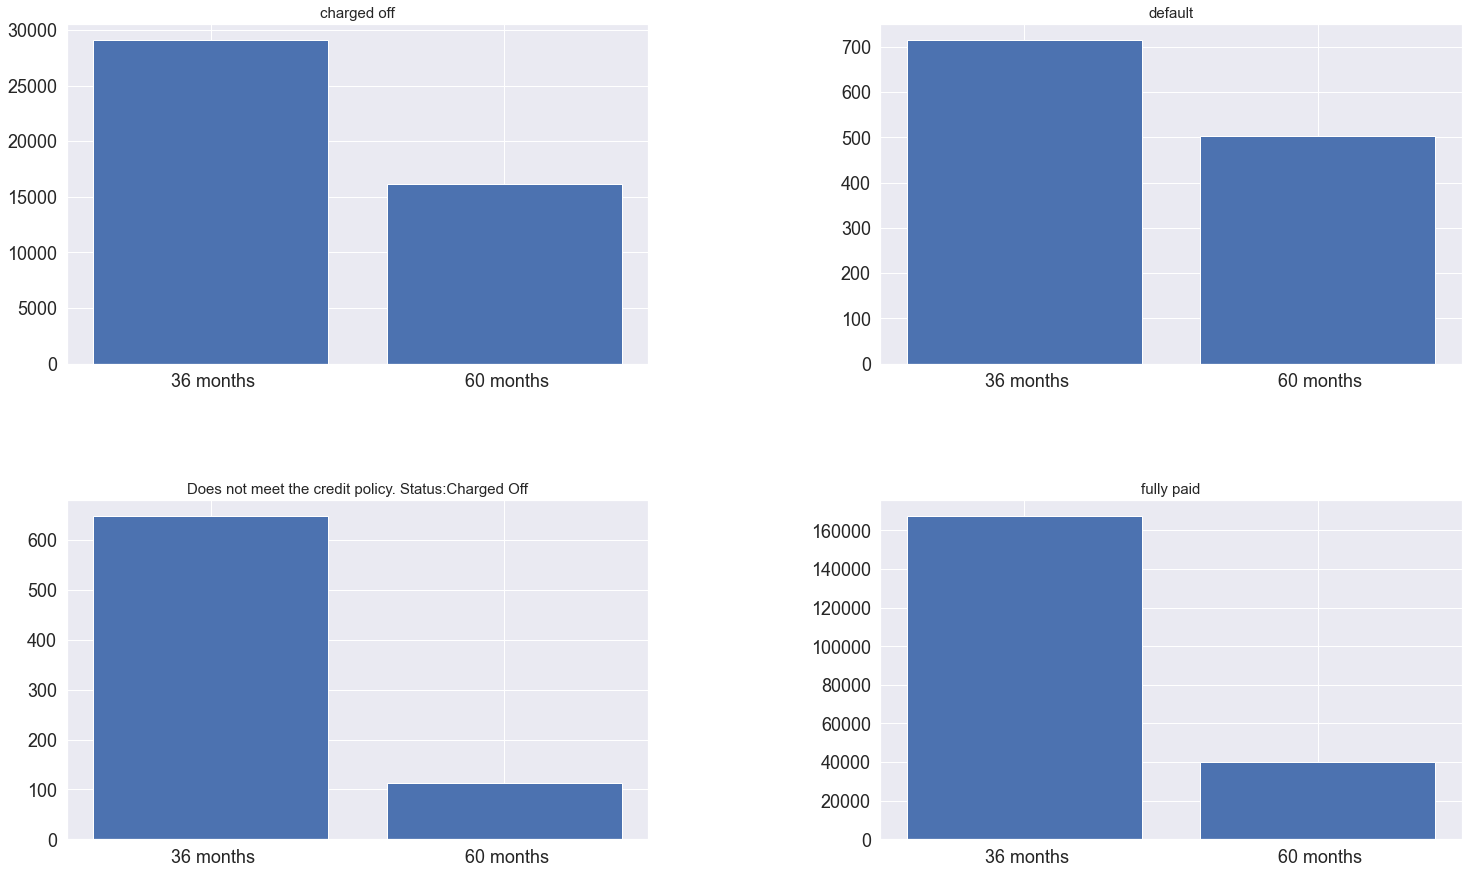

In [111]:
terms1 = charged_off.groupby(['term']).size().reset_index(name='count')
terms2 = default.groupby(['term']).size().reset_index(name='count')
terms3 = nopol_charged_off.groupby(['term']).size().reset_index(name='count')
terms4 = fully_paid.groupby(['term']).size().reset_index(name='count')

figure, axis = plt.subplots(2, 2, figsize=(25,15))
axis[0,0].bar(x = 'term', height = 'count', data = terms1)
axis[0,0].set_title('charged off', fontdict = {'fontsize':15})
axis[0,0].tick_params(labelsize=18)

axis[0,1].bar(x = 'term', height = 'count', data = terms2)
axis[0,1].set_title('default',fontdict = {'fontsize':15})
axis[0,1].tick_params(labelsize=18)

axis[1,0].bar(x = 'term', height = 'count', data = terms3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off',fontdict = {'fontsize':15})
axis[1,0].tick_params(labelsize=18)

axis[1,1].bar(x = 'term', height = 'count', data = terms4)
axis[1,1].set_title('fully paid', fontdict = {'fontsize':15})
axis[1,1].tick_params(labelsize=18)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

people are prefering short term loans over the long one.

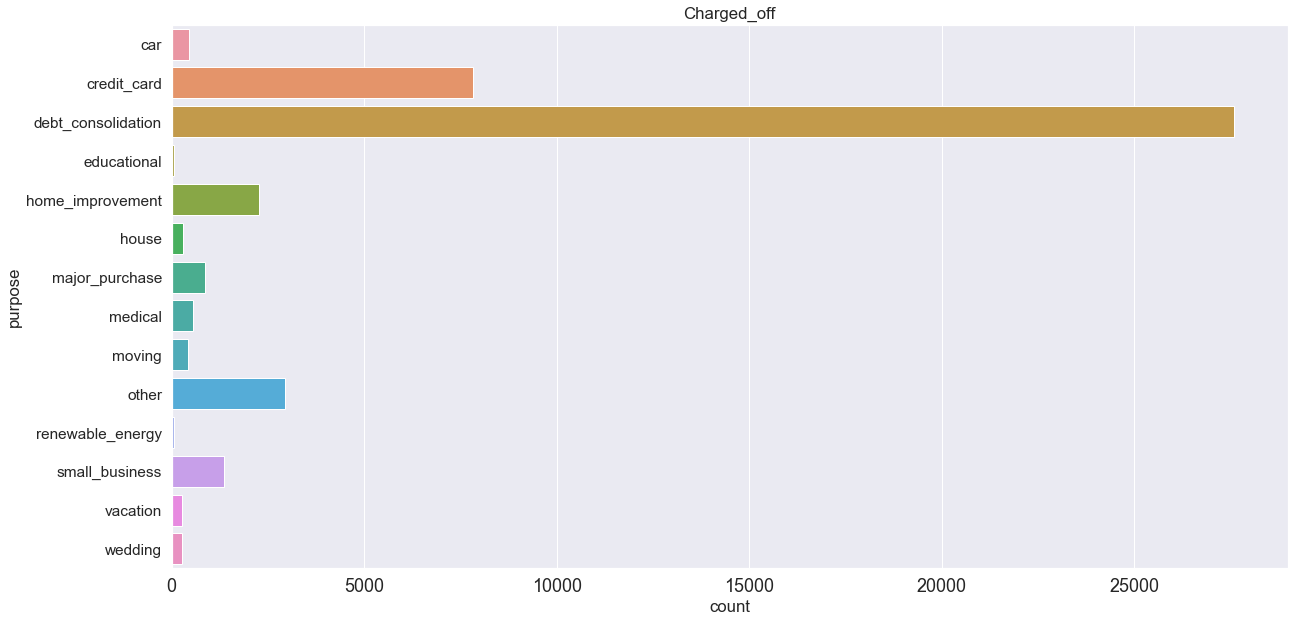

In [112]:
charged_off_purpose = charged_off.groupby(['purpose']).size().reset_index(name='count')
charged_off_purpose['percentage_(%)'] = (charged_off_purpose['count']/len(charged_off))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = charged_off_purpose)
plt.title('Charged_off')
plt.xticks(fontsize=18)
plt.show()

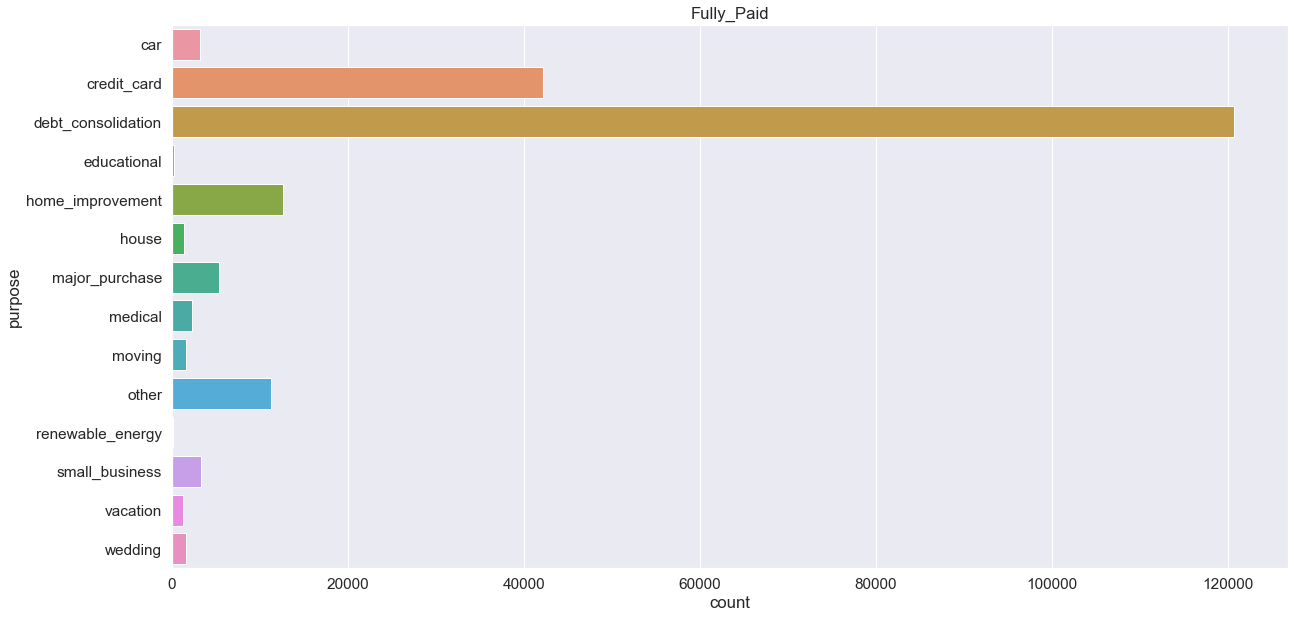

In [113]:
fully_paid_purpose = fully_paid.groupby(['purpose']).size().reset_index(name='count')
fully_paid_purpose['percentage_(%)'] = (fully_paid_purpose['count']/len(fully_paid))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = fully_paid_purpose)
plt.title('Fully_Paid')
plt.show()

Debt Consolidation : 
It's type of personal financing tool used to pay down your other ongoing loans.
One should look for such facilities when they are getting lower rate of interest on DC then the ongoing loans, using this you have to pay low rates and the repayment can done in short time.
Down side is people opt for this when they are unable to pay ongoing loans and they do take another higher interest rate DC loan for repayment of the ongoing ones.
here in training dataset, almost 60% of the loans are of this type.

Credit Card : 
it's the second most alloted loan to the customers.
23% loans are credit loans in training data.

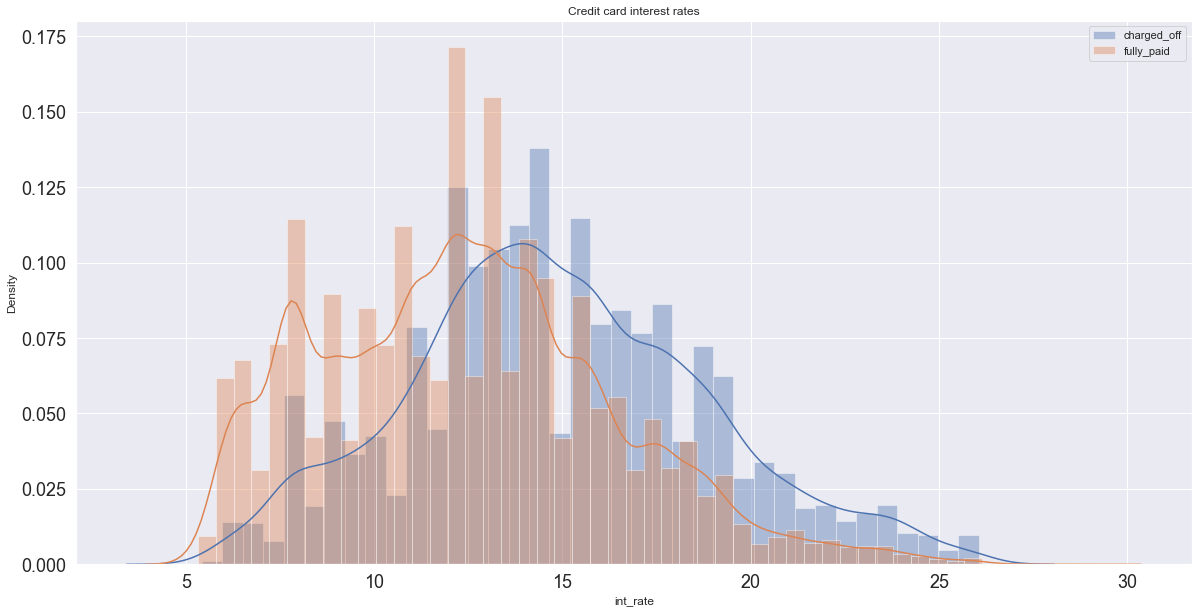

In [114]:
chargedoff_credit_card = charged_off[charged_off['purpose'] == 'credit_card']['int_rate']
fullypaid_credit_card = fully_paid[fully_paid['purpose'] == 'credit_card']['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})
sns.distplot(chargedoff_credit_card, label = 'charged_off', hist = True)
sns.distplot(fullypaid_credit_card, label = 'fully_paid', hist = True)

plt.legend()
plt.title('Credit card interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

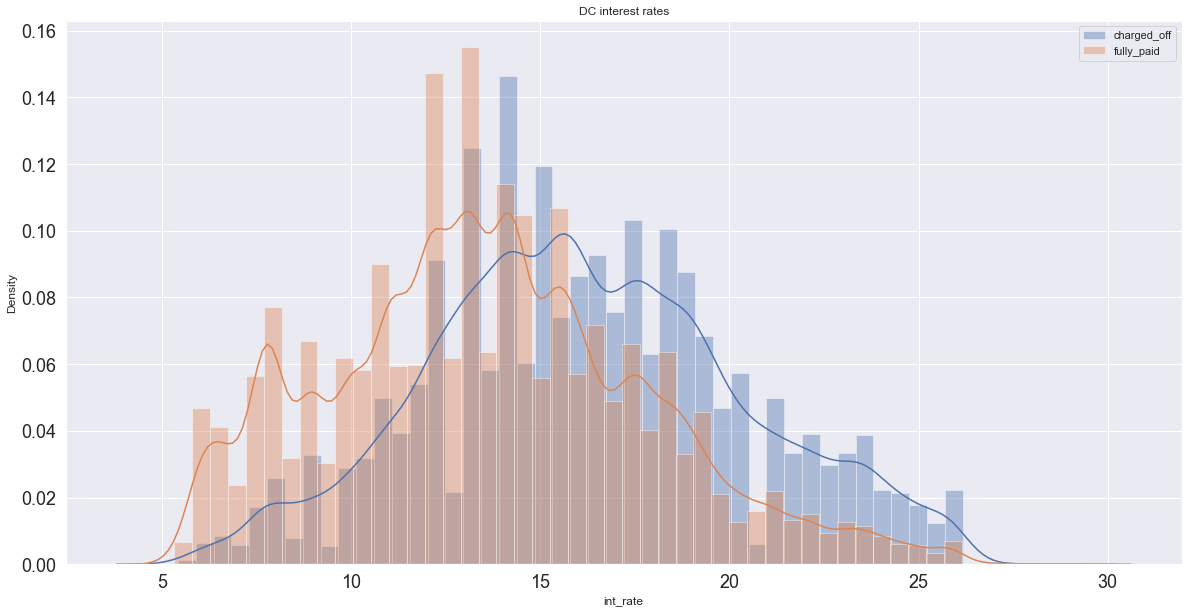

In [115]:
chargedoff_debtconsolidation = charged_off[charged_off['purpose'] == 'debt_consolidation']['int_rate']
fullypaid_debtconsolidation = fully_paid[fully_paid['purpose'] == 'debt_consolidation']['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})
sns.distplot(chargedoff_debtconsolidation, label = 'charged_off', hist = True)
sns.distplot(fullypaid_debtconsolidation, label = 'fully_paid', hist = True)

plt.legend()
plt.title('DC interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Interest Rate:
Nothing abnormal with the interest rates for all the risky categories.
The distribution of rate of interest for fully_paid is a bit right skewed.
the credit cards and debt consolidation loans charges more compared to other types of loan.

In [116]:
# Dropping irrelevant features
df.drop(['policy_code', 'member_id' ,  'id' , 'emp_title' , 'url' , 'zip_code' , 'addr_state',
         'recoveries','grade' , 'verification_status' , 'purpose' , 'title','pymnt_plan', 'initial_list_status',
         'application_type','issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1,inplace = True)

In [117]:
df.shape

(887379, 33)

In [118]:
for col in df.columns:
    print(col , '->' , df[col].nunique() , '->' , df[col].unique())

loan_amnt -> 1372 -> [ 5000.  2500.  2400. ... 32925. 32825. 32575.]
funded_amnt -> 1372 -> [ 5000.  2500.  2400. ... 32925. 32825. 32575.]
funded_amnt_inv -> 9856 -> [ 4975.  2500.  2400. ... 33625. 34125. 30525.]
term -> 2 -> [' 36 months' ' 60 months']
int_rate -> 542 -> [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.

<AxesSubplot:>

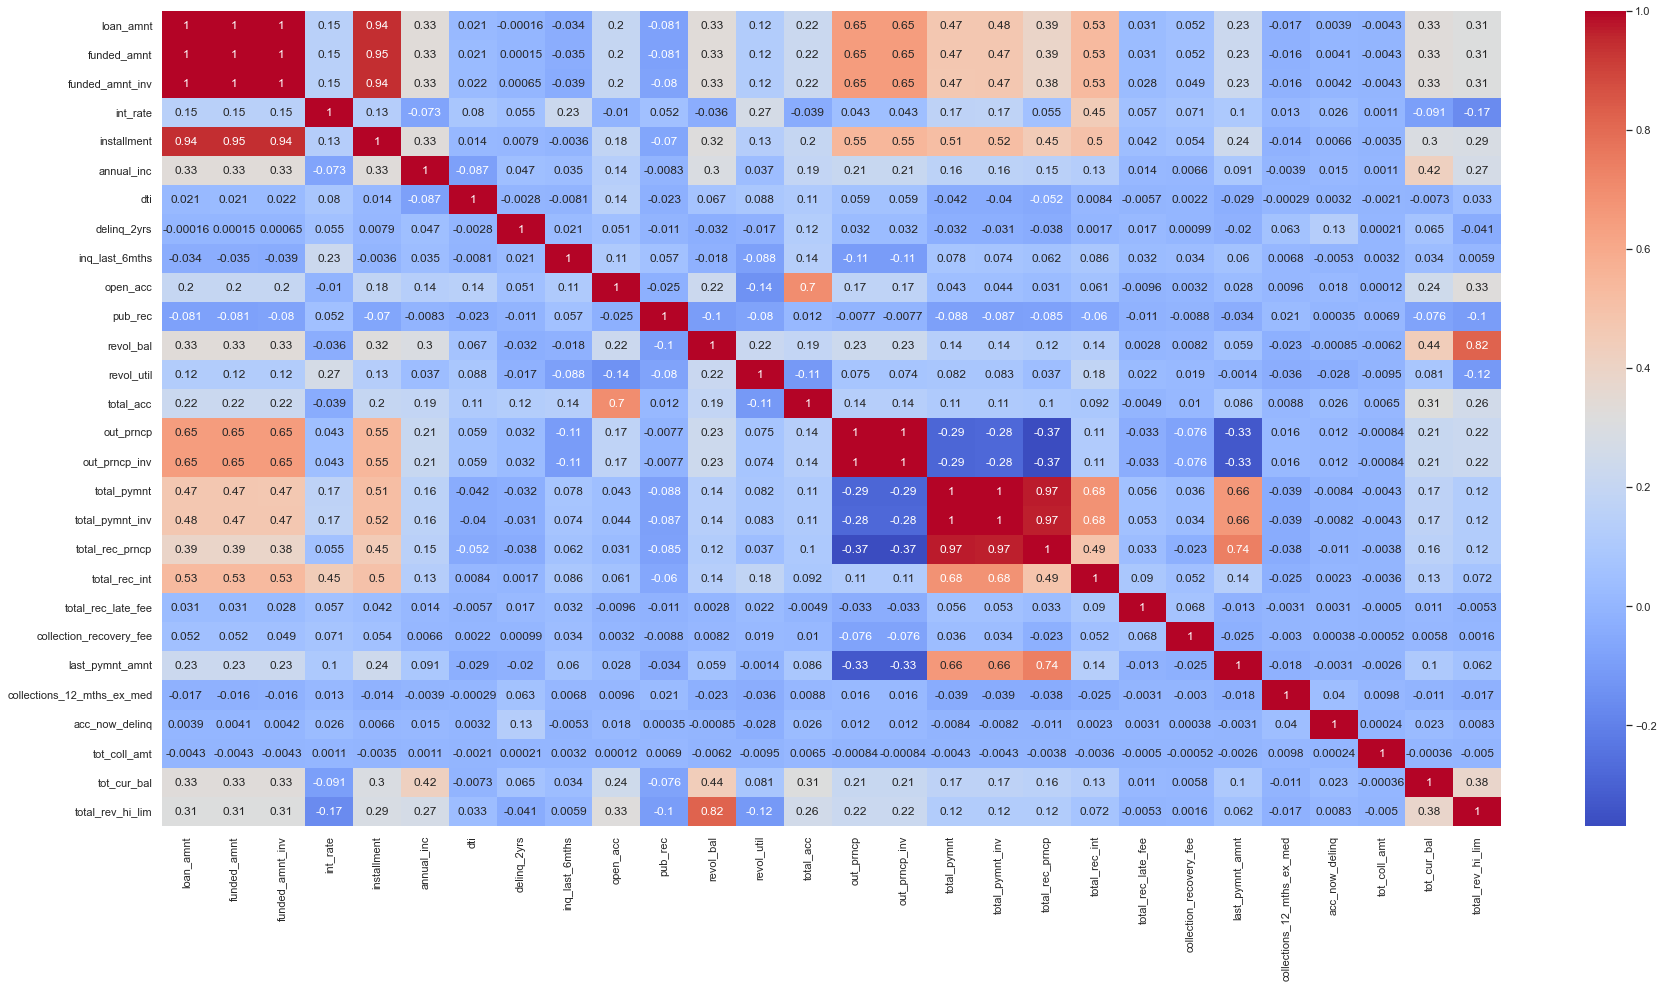

In [119]:
# Correlation Matrix of the features 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (30,15))

sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [120]:
# Dropping features which have correlation > 0.75 with any other feature
corr_matrix=df.corr().abs()

upperMatrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
corrFutures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.75)]
print(corrFutures)
df.drop(columns=corrFutures , inplace = True)

['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rev_hi_lim']


In [121]:
df.shape

(887379, 26)

In [122]:
# Percentage of missing values of each feature
for col in df.columns:
    per = df[col].isnull().sum()/len(df[col])*100
    print(col , '-' , per)

loan_amnt - 0.0
term - 0.0
int_rate - 0.0
sub_grade - 0.0
emp_length - 5.051392922302647
home_ownership - 0.0
annual_inc - 0.00045076568185634325
loan_status - 0.0
dti - 0.0
delinq_2yrs - 0.0032680511934584885
inq_last_6mths - 0.0032680511934584885
open_acc - 0.0032680511934584885
pub_rec - 0.0032680511934584885
revol_bal - 0.0
revol_util - 0.05657109307297107
total_acc - 0.0032680511934584885
out_prncp - 0.0
total_pymnt - 0.0
total_rec_int - 0.0
total_rec_late_fee - 0.0
collection_recovery_fee - 0.0
last_pymnt_amnt - 0.0
collections_12_mths_ex_med - 0.016340255967292442
acc_now_delinq - 0.0032680511934584885
tot_coll_amt - 7.919502264534094
tot_cur_bal - 7.919502264534094


In [123]:
df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal
count,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887350.000000,8.171030e+05,8.171030e+05
mean,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,55.067693,...,8403.124852,7558.826684,1754.804327,0.396692,4.880757,2164.145585,0.014380,0.004991,2.257026e+02,1.394582e+05
std,8435.455601,4.381867,6.469830e+04,17.190626,0.862244,0.998448,5.317313,0.582091,2.242679e+04,23.834344,...,8493.450269,7871.243336,2095.356099,4.087825,63.125281,4794.783233,0.134191,0.077625,1.031137e+04,1.537500e+05
min,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,37.700000,...,0.000000,1914.590000,441.460000,0.000000,0.000000,280.170000,0.000000,0.000000,0.000000e+00,2.985300e+04
50%,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,56.000000,...,6458.290000,4894.999117,1073.280000,0.000000,0.000000,462.780000,0.000000,0.000000,0.000000e+00,8.055900e+04
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,73.600000,...,13659.055000,10616.814231,2238.265000,0.000000,0.000000,831.245000,0.000000,0.000000,0.000000e+00,2.082050e+05
max,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,892.300000,...,49372.860000,57777.579870,24205.620000,358.680000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06


In [124]:
# Dropping rows with missing values of features
df.dropna(inplace = True)

In [125]:
df.shape

(773968, 26)

In [126]:
for col in df.columns:
    per = df[col].isnull().sum()/len(df[col])*100
    print(col , '-' , per)

loan_amnt - 0.0
term - 0.0
int_rate - 0.0
sub_grade - 0.0
emp_length - 0.0
home_ownership - 0.0
annual_inc - 0.0
loan_status - 0.0
dti - 0.0
delinq_2yrs - 0.0
inq_last_6mths - 0.0
open_acc - 0.0
pub_rec - 0.0
revol_bal - 0.0
revol_util - 0.0
total_acc - 0.0
out_prncp - 0.0
total_pymnt - 0.0
total_rec_int - 0.0
total_rec_late_fee - 0.0
collection_recovery_fee - 0.0
last_pymnt_amnt - 0.0
collections_12_mths_ex_med - 0.0
acc_now_delinq - 0.0
tot_coll_amt - 0.0
tot_cur_bal - 0.0


In [127]:
# Classification of loan_status into binary subcategories. Not considering issued as it consists of customers who
# have recently registered and it they would be of no help in credit risk analysis.
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df.loc[:, 'label'] = df['loan_status'].apply(classify_label)
df = df.drop('loan_status', axis=1)

In [128]:
# Number of categorical features present
df.select_dtypes(include=['object']).columns.tolist()
# grade , emp_length , purpose , title , 4 dates , 

# df.select_dtypes(exclude=['object']).columns.tolist()

['term', 'sub_grade', 'emp_length', 'home_ownership']

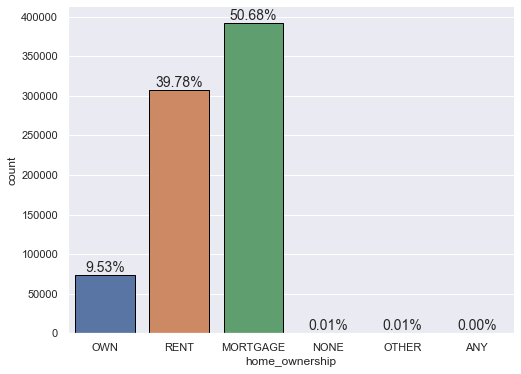

In [129]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='home_ownership', data=df, edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+.4, height, '{:.2%}'.format(height/len(df)), ha='center', va='bottom', fontsize=14)

sns.despine()

In [130]:
# Replacing none and any with other in home_ownership feature
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [131]:
# Converting employee length in years to int 
import re
# copy the feature
emp_length = df['emp_length'].copy()

emp_length_nonull = emp_length.dropna()

# manually replace '< 1 year' to '0'
emp_length_nonull = emp_length_nonull.replace('< 1 year', '0')

# format the rest by removing all strings except for numbers
emp_length_encode = [re.sub('[<years+ ]', '', txt) for txt in emp_length_nonull]

# squeeze back to the original dataset
emp_length[emp_length.notnull()] = np.squeeze(emp_length_encode)
df.loc[:, 'emp_length'] = emp_length

# df_filter_issue['emp_length']

In [132]:
# Ordinal Encoding of 'term' and 'sub_grade' features
df['term'] = pd.factorize(df['term'])[0]
df['sub_grade'] = pd.factorize(df['sub_grade'])[0]

In [133]:
df.select_dtypes(include=['object']).columns.tolist()

['emp_length', 'home_ownership']

In [134]:
df['emp_length'] = df['emp_length'].astype('int')

In [135]:
# One Hot Encoding of 'home_ownership' feature
df = pd.get_dummies(df,prefix=['home_ownership'], columns = ['home_ownership'], drop_first=True)

In [136]:
df.dropna(axis = 0 , subset = ['label'] , inplace = True)

In [137]:
df.shape

(766142, 28)

In [138]:
for col in df.columns:
    per = df[col].isnull().sum()/len(df[col])*100
    print(col , '-' , per)

loan_amnt - 0.0
term - 0.0
int_rate - 0.0
sub_grade - 0.0
emp_length - 0.0
annual_inc - 0.0
dti - 0.0
delinq_2yrs - 0.0
inq_last_6mths - 0.0
open_acc - 0.0
pub_rec - 0.0
revol_bal - 0.0
revol_util - 0.0
total_acc - 0.0
out_prncp - 0.0
total_pymnt - 0.0
total_rec_int - 0.0
total_rec_late_fee - 0.0
collection_recovery_fee - 0.0
last_pymnt_amnt - 0.0
collections_12_mths_ex_med - 0.0
acc_now_delinq - 0.0
tot_coll_amt - 0.0
tot_cur_bal - 0.0
label - 0.0
home_ownership_OTHER - 0.0
home_ownership_OWN - 0.0
home_ownership_RENT - 0.0


In [139]:
# Normalizing the dataset as few of the values were inf or -inf 
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn = df.copy()

# apply normalization techniques
listt = [ 'loan_amnt', 'term', 'int_rate', 'sub_grade', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'label', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT']
for l in listt:
    df_sklearn[l] = MinMaxScaler().fit_transform(np.array(df_sklearn[l]).reshape(-1,1))
    

# view normalized data
display(df_sklearn)


,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,label,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
42535,0.766176,0.0,0.239544,0.000000,1.0,0.005392,0.060100,0.000000,0.000,0.146067,...,0.0,0.024275,0.00,0.0,0.000000,0.014354,0.0,0.0,1.0,0.0
42536,0.257353,0.0,0.365864,0.029412,0.1,0.002338,0.066013,0.000000,0.000,0.123596,...,0.0,0.009133,0.00,0.0,0.000000,0.001765,0.0,0.0,0.0,1.0
42537,0.323529,0.0,0.054922,0.058824,1.0,0.010657,0.036922,0.000000,0.125,0.123596,...,0.0,0.010101,0.00,0.0,0.000000,0.033455,0.0,0.0,0.0,0.0
42538,0.323529,0.0,0.346853,0.088235,1.0,0.003812,0.044517,0.000000,0.000,0.067416,...,0.0,0.003267,0.00,0.0,0.001681,0.001701,0.0,0.0,0.0,1.0
42539,0.411765,0.0,0.151246,0.117647,0.2,0.006234,0.043387,0.000000,0.000,0.078652,...,0.0,0.013058,0.00,0.0,0.000165,0.034061,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,0.264706,0.0,0.281791,0.088235,0.8,0.002864,0.075395,0.000000,0.000,0.089888,...,0.0,0.009105,0.00,0.0,0.000000,0.003159,0.0,0.0,0.0,1.0
887375,0.676471,0.0,0.281791,0.088235,1.0,0.007919,0.010249,0.000000,0.125,0.044944,...,0.0,0.021851,0.00,0.0,0.000000,0.017535,0.0,0.0,0.0,0.0
887376,0.352941,1.0,0.450782,0.617647,0.5,0.003286,0.081203,0.000000,0.000,0.089888,...,0.0,0.008665,0.00,0.0,0.000000,0.004272,0.0,0.0,0.0,1.0
887377,0.323529,1.0,0.619772,0.647059,0.1,0.006381,0.071453,0.025641,0.250,0.179775,...,0.0,0.008714,0.05,0.0,0.000000,0.007302,0.0,0.0,0.0,1.0


In [140]:
df.describe()

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,label,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,766142.000000,766142.000000,766142.000000,766142.000000,766142.000000,7.661420e+05,766142.000000,766142.000000,766142.000000,766142.000000,...,766142.000000,766142.000000,766142.000000,766142.000000,7.661420e+05,7.661420e+05,766142.000000,766142.000000,766142.000000,766142.000000
mean,15165.716375,0.312348,13.309050,10.867793,6.081628,7.690025e+04,18.377279,0.331369,0.672206,11.774172,...,4.359566,2168.399165,0.015511,0.005449,2.215803e+02,1.419051e+05,0.069337,0.000112,0.095156,0.397908
std,8454.698957,0.463451,4.412726,7.661992,3.664417,6.629201e+04,8.292873,0.887450,0.959910,5.362021,...,53.366935,4872.306412,0.139520,0.081174,1.063366e+04,1.549551e+05,0.254027,0.010594,0.293430,0.489467
min,1000.000000,0.000000,5.320000,0.000000,0.000000,3.800000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8800.000000,0.000000,9.990000,5.000000,3.000000,4.770000e+04,12.150000,0.000000,0.000000,8.000000,...,0.000000,292.120000,0.000000,0.000000,0.000000e+00,3.092000e+04,0.000000,0.000000,0.000000,0.000000
50%,14000.000000,0.000000,12.990000,10.000000,7.000000,6.500000e+04,17.880000,0.000000,0.000000,11.000000,...,0.000000,469.070000,0.000000,0.000000,0.000000e+00,8.347750e+04,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,1.000000,16.290000,16.000000,10.000000,9.100000e+04,24.240000,0.000000,1.000000,15.000000,...,0.000000,802.820000,0.000000,0.000000,0.000000e+00,2.115148e+05,0.000000,0.000000,0.000000,1.000000
max,35000.000000,1.000000,28.990000,34.000000,10.000000,9.500000e+06,380.530000,39.000000,8.000000,90.000000,...,5694.093600,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06,1.000000,1.000000,1.000000,1.000000


In [141]:
df = df_sklearn
X = df.drop(['label'], axis=1).select_dtypes(exclude=['object'])
y = df.label

# Model

In [142]:
# Splitting the dataset into test and train for model implementation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### RandomForest Classifier

In [143]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [144]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , y_pred))

Accuracy: 0.9725725821539051
[[213812    145]
 [  6159   9727]]


### Xgboost Classifier

In [145]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error

### Handling imbalanced dataset with SMOTE

In [146]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [211]:
import xgboost as xgb
#Declare the evaluation data set
eval_set = [(X_train, y_train),(X_test,y_test)]
#Initialise model using standard parameters
model = xgb.XGBClassifier(subsample=0.8,
colsample_bytree=1,
min_child_weight=5,
max_depth=9,
learning_rate=0.05,
reg_lambda = 7.0, 
gamma = 0.4,
n_estimators=800)
#Fit the model but stop early if there has been no reduction in error after 10 epochs.
model.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)
#Make predictions using for the validation set and evaluate
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))

Accuracy: 0.9722506232515239


In [212]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , predictions))

[[213788    169]
 [  6209   9677]]


In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    213957
         1.0       0.98      0.61      0.75     15886

    accuracy                           0.97    229843
   macro avg       0.98      0.80      0.87    229843
weighted avg       0.97      0.97      0.97    229843



In [150]:
# Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV
# PARAMETERS = {"subsample":[0.6, 0.8],
# "colsample_bytree":[0.6, 0.8],
# "max_depth":[4, 6, 8],
# "min_child_weight":[4,6,9],
# "learning_rate":[0.3, 0.1, 0.05],
# "n_estimators":[50 , 100 , 200]}

In [151]:
# #Initialise XGBoost Model
# model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)

# model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
# #Fit the model as done previously
# model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=2)
# print(model_gs.best_params_)

In [152]:
# xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 200)

In [153]:
# xg_reg.fit(X_train,y_train)

# preds = xg_reg.predict(X_test)

In [154]:
# preds = model_gs.predit(y_test)

In [155]:
# accuracy = accuracy_score(y_test, preds)

In [156]:
# accuracy


In [157]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test , preds))

In [158]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test , preds))

### SVM Classifier

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [160]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))